In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots that I'll create

# Read in the data
df = pd.read_csv('movies.csv')

In [52]:
#Take a look at the data
df.head()

,name,rating,genre,year,release date and country,release date,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",1980-06-13,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",1980-07-02,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",1980-06-20,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",1980-07-02,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",1980-07-25,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [53]:
#Check for missing data
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(f'{col} - {percent_missing}%')


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
release date and country - 0.0002608242044861763%
release date - 0.0002608242044861763%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [54]:
#Replace 'inf' values with 'nan" values, then drop 'nan' values

df.replace(-np.inf, np.nan)
df.dropna(inplace=True)

In [55]:
#Column data types
df.dtypes

name                         object
rating                       object
genre                        object
year                          int64
release date and country     object
release date                 object
votes                       float64
director                     object
writer                       object
star                         object
country                      object
budget                      float64
gross                       float64
company                      object
runtime                     float64
dtype: object

In [56]:
#Change the data type of the budget and gross columns from 'float64' to 'int64'
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [57]:
df

,name,rating,genre,year,release date and country,release date,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",1980-06-13,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",1980-07-02,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",1980-06-20,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",1980-07-02,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",1980-07-25,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",2020-01-17,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",2020-02-14,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",2020-01-17,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",2020-02-21,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [62]:
#Create correct year column and change data type from 'object' to 'int64'
df['yearcorrect'] = df['release date'] .astype(str).str[:4].astype('int64')

df

,name,rating,genre,year,release date and country,release date,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",2009-12-18,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",2019-04-26,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",1997-12-19,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",2015-12-18,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",2018-04-27,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",2015-01-15,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",1994-06-04,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",2001-05-11,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",1982-03-12,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [60]:
df.sort_values(by=['gross'], inplace=True, ascending=False)

In [16]:
# Drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,release date and country,release date,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",1980-06-13,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",1980-07-02,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",1980-06-20,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",1980-07-02,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",1980-07-25,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",2020-01-17,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",2020-02-14,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",2020-01-17,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",2020-02-21,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


Budget and company should have a high correlation with gross

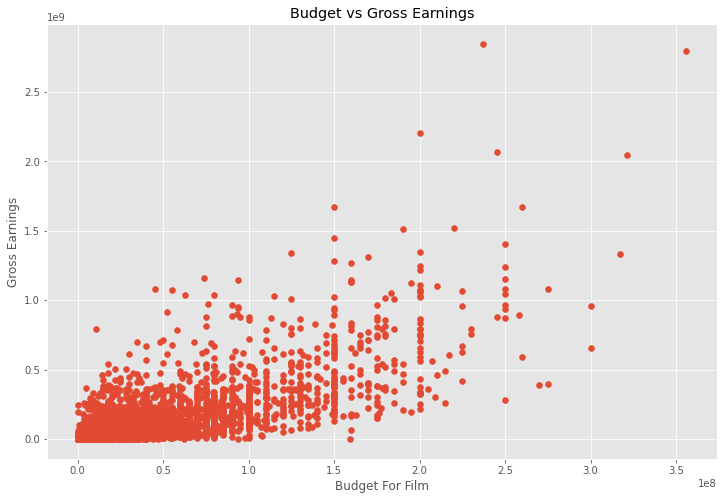

In [21]:
#Scatter plot of budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title("Budget vs Gross Earnings")

plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')

plt.show()

In [50]:
df.head()

,name,rating,genre,year,release date and country,release date,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,1705,1100000.0,785,1262,1533,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,2340,903000.0,105,512,1469,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,938,1100000.0,785,1262,1072,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,2130,876000.0,768,1805,355,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,2273,897000.0,105,512,1469,47,321000000,2048359754,983,149.0,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

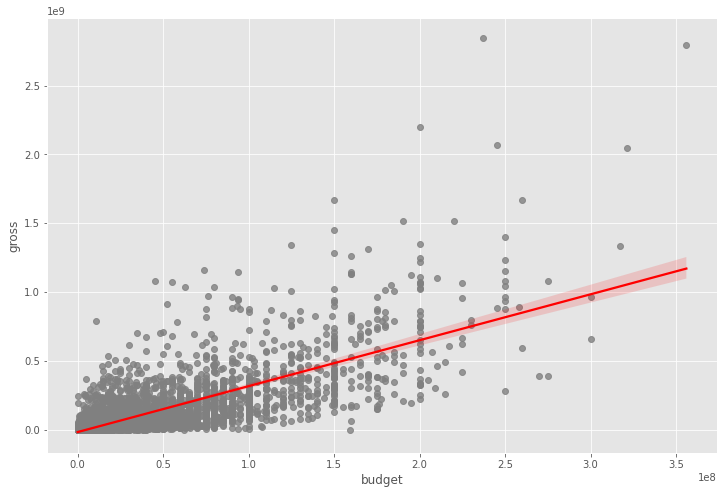

In [26]:
#Plot budget vs gross using seaborn

sns.regplot(x ='budget', y = 'gross', data = df, scatter_kws = {'color':'grey'}, line_kws = {'color':'red'})

Examining correlation with the premise that budget of the film is highly correlated with gross earninigs

In [42]:
# default correlation method is pearson, but we have kendall and also spearman
corr_matrix = df.corr(method = 'pearson')#['budget'].loc['gross'].dtype
corr_matrix

,year,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.206021,0.327722,0.274321,0.075077,0.970378
votes,0.206021,1.000000,0.439675,0.614751,0.352303,0.200303
budget,0.327722,0.439675,1.000000,0.740247,0.318695,0.314147
gross,0.274321,0.614751,0.740247,1.000000,0.275796,0.263212
runtime,0.075077,0.352303,0.318695,0.275796,1.000000,0.075793
yearcorrect,0.970378,0.200303,0.314147,0.263212,0.075793,1.000000


The above shows a high correlation between budget of the film and gross earnings as predicted

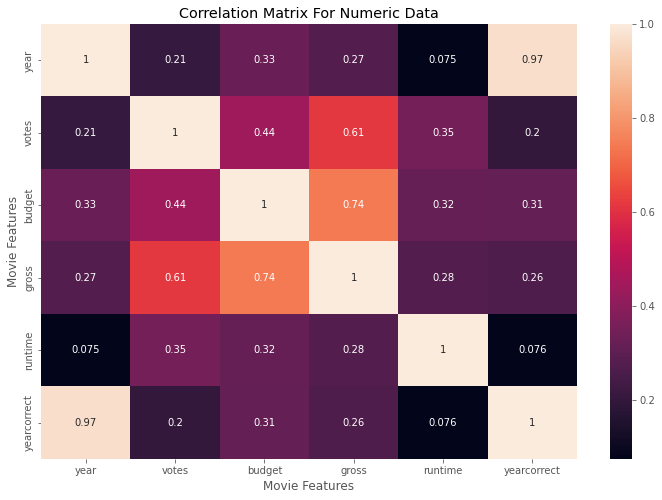

In [64]:
# Now to visualize the above correlation matrix

corr_matrix = df.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)

plt.title("Correlation Matrix For Numeric Data")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

Now I'm going to change the data type of the non numeric fields so I can check for correlations

In [48]:
# This code block assigns categorical data a numeric value so operations like correlation can be carried out
df_rank = df

for col_name in df_rank.columns:
    if df_rank[col_name].dtype == 'object':
        df_rank[col_name] = df_rank[col_name].astype('category')
        df_rank[col_name] =  df_rank[col_name].cat.codes

df_rank

,name,rating,genre,year,release date and country,release date,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,1705,1100000.0,785,1262,1533,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,2340,903000.0,105,512,1469,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,938,1100000.0,785,1262,1072,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,2130,876000.0,768,1805,355,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,2273,897000.0,105,512,1469,47,321000000,2048359754,983,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,2070,3500.0,585,2923,1497,47,3000000,5073,1385,96.0,2015
2434,2969,5,0,1993,1467,723,1900.0,1805,3101,185,47,5000000,2970,1376,97.0,1994
3681,1595,3,6,2000,1721,1151,43000.0,952,1682,526,6,5000000,2554,466,108.0,2001
272,2909,6,9,1982,1525,69,2300.0,261,54,1472,47,800000,2270,582,85.0,1982


In [63]:
df

,name,rating,genre,year,release date and country,release date,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",2009-12-18,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",2019-04-26,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",1997-12-19,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",2015-12-18,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",2018-04-27,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",2015-01-15,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",1994-06-04,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",2001-05-11,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",1982-03-12,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


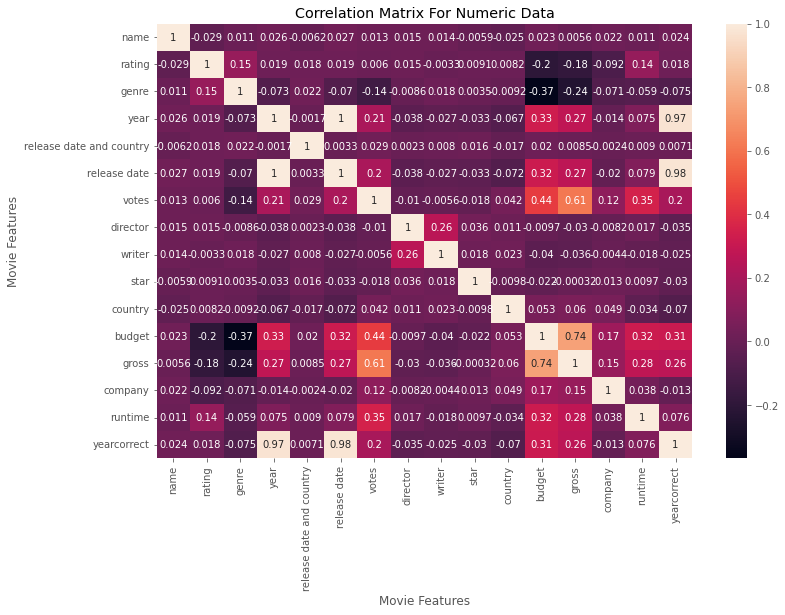

In [65]:
corr_matrix = df_rank.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)

plt.title("Correlation Matrix For Numeric Data")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [66]:
df_rank.corr()

,name,rating,genre,year,release date and country,release date,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.027290,0.012615,0.015246,0.013828,-0.005938,-0.025490,0.023392,0.005639,0.021697,0.010850,0.024072
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.019099,0.006031,0.014656,-0.003281,0.009063,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.017740
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,-0.070363,-0.135990,-0.008553,0.017749,0.003494,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.074762
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.997319,0.206021,-0.038354,-0.026663,-0.032901,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.970378
release date and country,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.003348,0.028833,0.002308,0.007950,0.015581,-0.017228,0.019952,0.008501,-0.002407,0.008975,0.007095
release date,0.027290,0.019099,-0.070363,0.997319,0.003348,1.000000,0.204543,-0.037969,-0.027125,-0.032677,-0.072089,0.320797,0.272843,-0.019607,0.079273,0.975509
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.204543,1.000000,-0.010376,-0.005614,-0.017935,0.041551,0.439675,0.614751,0.118470,0.352303,0.200303
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,-0.037969,-0.010376,1.000000,0.261520,0.036360,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.034701
writer,0.013828,-0.003281,0.017749,-0.026663,0.007950,-0.027125,-0.005614,0.261520,1.000000,0.018461,0.022705,-0.039936,-0.036214,-0.004425,-0.017947,-0.025444
star,-0.005938,0.009063,0.003494,-0.032901,0.015581,-0.032677,-0.017935,0.036360,0.018461,1.000000,-0.009770,-0.021931,-0.000325,0.013350,0.009719,-0.029591


The heatmap contains a lot of data so its crowded, to better view the correlations we're going to use the unstack method

In [70]:
correlation_mat = df_rank.corr()
corr_pairs = correlation_mat.unstack()


pd.set_option('display.max_rows', None)
corr_pairs

name                      name                        1.000000
                          rating                     -0.029234
                          genre                       0.010996
                          year                        0.025542
                          release date and country   -0.006152
                          release date                0.027290
                          votes                       0.012615
                          director                    0.015246
                          writer                      0.013828
                          star                       -0.005938
                          country                    -0.025490
                          budget                      0.023392
                          gross                       0.005639
                          company                     0.021697
                          runtime                     0.010850
                          yearcorrect                 0

In [71]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget                    genre                      -0.368523
genre                     budget                     -0.368523
                          gross                      -0.244101
gross                     genre                      -0.244101
budget                    rating                     -0.203946
rating                    budget                     -0.203946
                          gross                      -0.181906
gross                     rating                     -0.181906
votes                     genre                      -0.135990
genre                     votes                      -0.135990
company                   rating                     -0.092357
rating                    company                    -0.092357
genre                     yearcorrect                -0.074762
yearcorrect               genre                      -0.074762
year                      genre                      -0.073167
genre                     year                       -0

In [73]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross                     votes                       0.614751
votes                     gross                       0.614751
gross                     budget                      0.740247
budget                    gross                       0.740247
yearcorrect               year                        0.970378
year                      yearcorrect                 0.970378
yearcorrect               release date                0.975509
release date              yearcorrect                 0.975509
year                      release date                0.997319
release date              year                        0.997319
name                      name                        1.000000
company                   company                     1.000000
gross                     gross                       1.000000
budget                    budget                      1.000000
country                   country                     1.000000
star                      star                        1

From the above, votes and budget have the highest correlation with gross earnings
Company has low correlation this is contrary to my hypothesis